##**What is a Generative Adversarial Networks(GAN) in Pytorch?**

>Generative Adversarial Networks (GANs) help models to generate realistic data like images. Using GANs two neural networks the generator and the discriminator are trained together in a competitive setup where the ***generator*** creates synthetic images and the ***discriminator*** learns to distinguish them from real ones. This adversarial training improves both networks over time which results in high-quality generated images. In this article we will implement GANs using the PyTorch and train a model on the MNIST dataset to generate handwritten digit images.
>
>GAN is composed of two separate models. The first, called the ***Generator***, learns to convert a sample of noise (often drawn from a standard normal distribution) into a fake image. This image is then fed to the ***Discriminator***, which judges whether the image is fake or real. Using the loss that emerges from this judgment, the networks are optimized jointly, after which the process starts again.

###**Why Choose PyTorch for GANs?**

>PyTorch is used deep learning framework because of its:
> * Dynamic Computation Graphs
* User-Friendly API
* Strong Integration with Python
* Large Community
* Efficient GPU Acceleration


###**Implementing GANs using PyTorch Framework**
>We will build and train a Generative Adversarial Network (GAN) using PyTorch to generate realistic handwritten digit images from the MNIST dataset.
>
>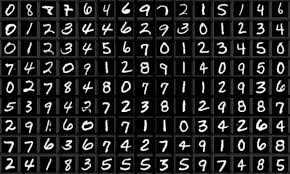

In [1]:
import torch
import torch.nn as nn
import datasets
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms , datasets
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import torchvision.utils as vutils
import os

In [2]:
# parameters
batch_size , image_size  , nz , num_epochs , lr , beta1 = 128 , 28 , 100 , 50 , 0.0002 , 0.5

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
print(device)

cpu


In [5]:
transform = transforms.Compose([
    transforms.ToTensor() , transforms.Normalize((0.5,) , (0.5,))
])

In [6]:
dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size , shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 509kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.63MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.13MB/s]


In [7]:
class Generator(nn.Module):

    def __init__(self):
      super().__init__()
      self.model = nn.Sequential(nn.Linear(nz, 256), nn.LeakyReLU(0.2 , inplace=True), nn.Linear(256 , 512), nn.LeakyReLU(0.2 , inplace=True), nn.Linear(512, 1024), nn.LeakyReLU(0.2 , inplace=True), nn.Linear(1024, image_size * image_size), nn.Tanh())

    def forward(self, z):
      out = self.model(z)
      return out.view(-1 , 1, image_size, image_size)

In [24]:
class Discriminator(nn.Module):

  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Linear(image_size * image_size , 512), nn.LeakyReLU(0.2 , inplace=True), nn.Linear(512 , 256), nn.LeakyReLU(0.2 , inplace=True), nn.Linear(256 , 1), nn.Sigmoid())

  def forward(self, X):
    X = X.view(-1 , image_size * image_size)
    return self.model(X)

In [26]:
gen = Generator().to(device)
dis = Discriminator ().to(device)

In [27]:
criterion = nn.BCELoss()
optimizer_g = optim.Adam(gen.parameters() , lr=lr , betas=(beta1 , 0.999))
optimzer_d= optim.Adam(dis.parameters() , lr=lr , betas=(beta1 , 0.999))

In [28]:
fixed_noise = torch.randn(64 , nz , device=device)

In [29]:
print(f'Starting Training...')
os.makedirs(
    'result',
    exist_ok=True
)

Starting Training...


In [30]:
for epoch in range(num_epochs):
  for i , (real_images , _) in enumerate(dataloader):

    dis.zero_grad()

    real_images = real_images.to(device)
    batch_size = real_images.size(0)
    real_labels = torch.ones(batch_size , 1 , device=device)
    fake_labels = torch.zeros(batch_size , 1 , device=device)

    output_real = dis(real_images)
    d_loss_real = criterion(output_real , real_labels)

    noise = torch.randn(batch_size , nz , device=device)
    fake_images = gen(noise)
    output_fake = dis(fake_images.detach())
    d_loss_fake = criterion(output_fake , fake_labels)

    d_loss = d_loss_real + d_loss_fake
    d_loss.backward()
    optimzer_d.step()

    gen.zero_grad()

    outputs = dis(fake_images)
    g_loss = criterion(outputs , real_labels)
    g_loss.backward()
    optimizer_g.step()

    if i % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}] Batch {i}/{len(dataloader)} \n Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}')

    with torch.no_grad():
      fake = gen(fixed_noise).detach().cpu()
      grid = vutils.make_grid(fake, padding=2, normalize=True)
      os.makedirs('images', exist_ok=True)
      vutils.save_image(grid, f"images/fake_epoch_{epoch+1:03d}.png")



Epoch [1/50] Batch 0/469 
 Loss D: 1.3924, Loss G: 0.7180
Epoch [1/50] Batch 100/469 
 Loss D: 1.3809, Loss G: 0.7592
Epoch [1/50] Batch 200/469 
 Loss D: 1.1176, Loss G: 0.9486
Epoch [1/50] Batch 300/469 
 Loss D: 0.8491, Loss G: 1.0971
Epoch [1/50] Batch 400/469 
 Loss D: 0.8273, Loss G: 1.1014
Epoch [2/50] Batch 0/469 
 Loss D: 0.6354, Loss G: 1.8134
Epoch [2/50] Batch 100/469 
 Loss D: 0.9827, Loss G: 1.0939
Epoch [2/50] Batch 200/469 
 Loss D: 1.1227, Loss G: 1.0088
Epoch [2/50] Batch 300/469 
 Loss D: 1.0958, Loss G: 1.9009
Epoch [2/50] Batch 400/469 
 Loss D: 0.7038, Loss G: 2.5637
Epoch [3/50] Batch 0/469 
 Loss D: 0.8631, Loss G: 1.6634
Epoch [3/50] Batch 100/469 
 Loss D: 0.8097, Loss G: 1.7140
Epoch [3/50] Batch 200/469 
 Loss D: 0.8857, Loss G: 1.4084
Epoch [3/50] Batch 300/469 
 Loss D: 0.9283, Loss G: 2.1134
Epoch [3/50] Batch 400/469 
 Loss D: 1.4677, Loss G: 0.6825
Epoch [4/50] Batch 0/469 
 Loss D: 0.8262, Loss G: 2.4032
Epoch [4/50] Batch 100/469 
 Loss D: 0.7818, Los